In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style='darkgrid', palette='muted')

In [2]:
pip install seaborn

In [3]:
pip install category_encoders

In [4]:
train = pd.read_csv('train_LZdllcl.csv')
test = pd.read_csv('test_2umaH9m.csv')

In [5]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
train.shape, test.shape

((54808, 14), (23490, 13))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
num_cont = [col for col in train.columns if (train[col].dtype in ['int64', 'float64']) 
            and (train[col].nunique() > 10)
            and (col not in ['employee_id', 'is_promoted'])]

num_disc = [col for col in train.columns if (train[col].dtype in ['int64', 'float64']) 
            and (train[col].nunique() <= 10)
            and (col not in ['employee_id', 'is_promoted'])]

cat_cols = [col for col in train.columns if (train[col].dtype in ['object'])
            and (col not in ['employee_id', 'is_promoted'])]
target = ['is_promoted']

In [9]:
train.isna().sum()/train.shape[0]*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

# Data Undestanding

## Target Distribution

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


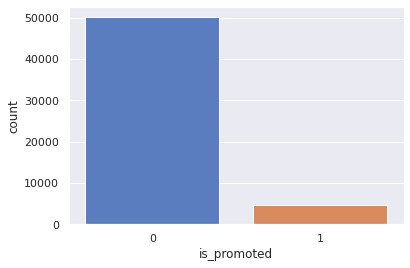

In [10]:
sns.countplot(train[target[0]])

## Numerical Features Distribution

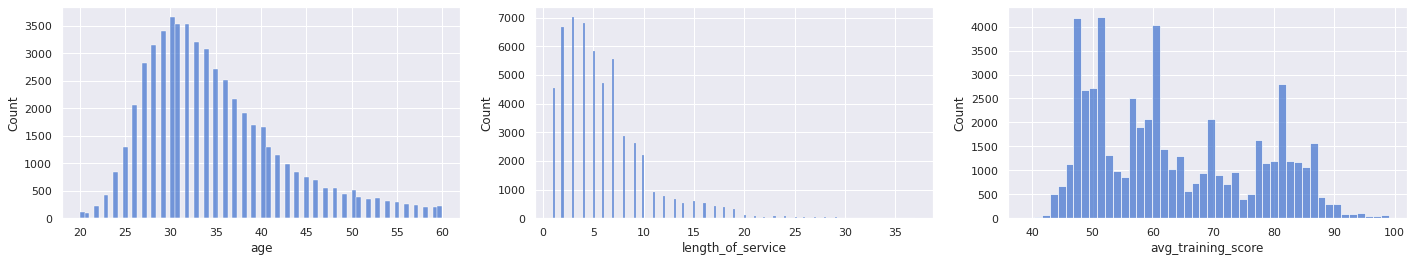

In [11]:
plt.figure(figsize=(20,4))
for i, col in enumerate(num_cont):
    plt.subplot(1,3,i+1)
    sns.histplot(train[col])
plt.tight_layout(pad=2.0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


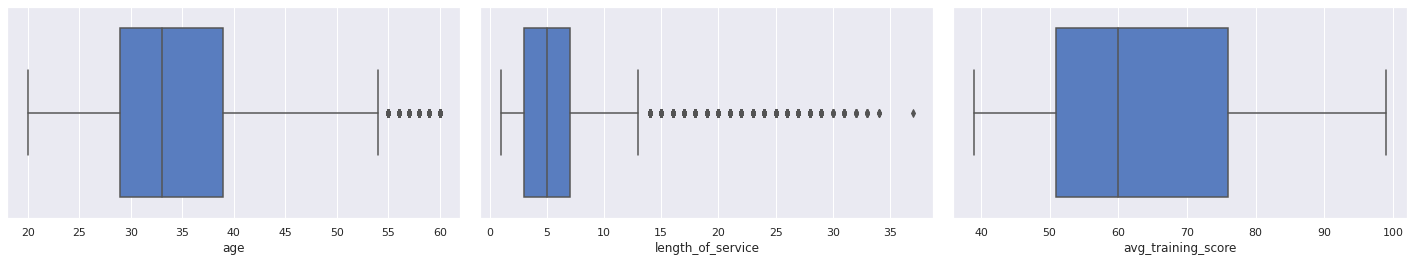

In [12]:
plt.figure(figsize=(20,4))
for i, col in enumerate(num_cont):
    plt.subplot(1,3,i+1)
    sns.boxplot(train[col])
plt.tight_layout(pad=2.0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

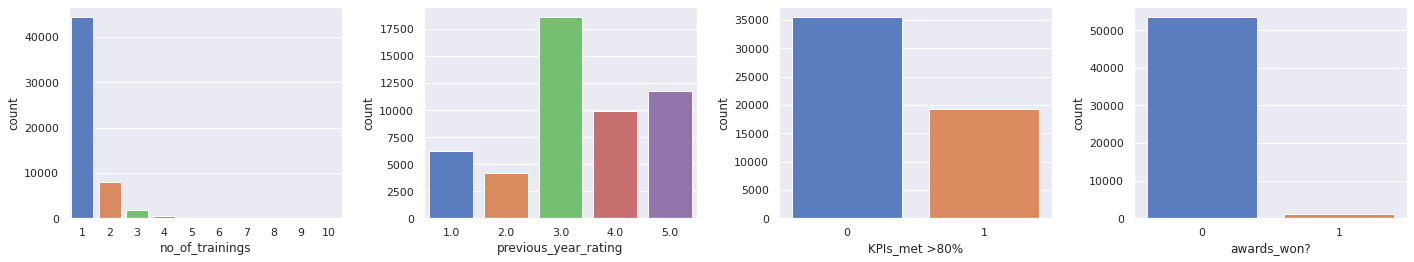

In [13]:
plt.figure(figsize=(20,4))
for i, col in enumerate(num_disc):
    plt.subplot(1,4,i+1)
    sns.countplot(train[col])
plt.tight_layout(pad=2.0)

## Categorical Features Distribution

In [14]:
len(cat_cols)

5

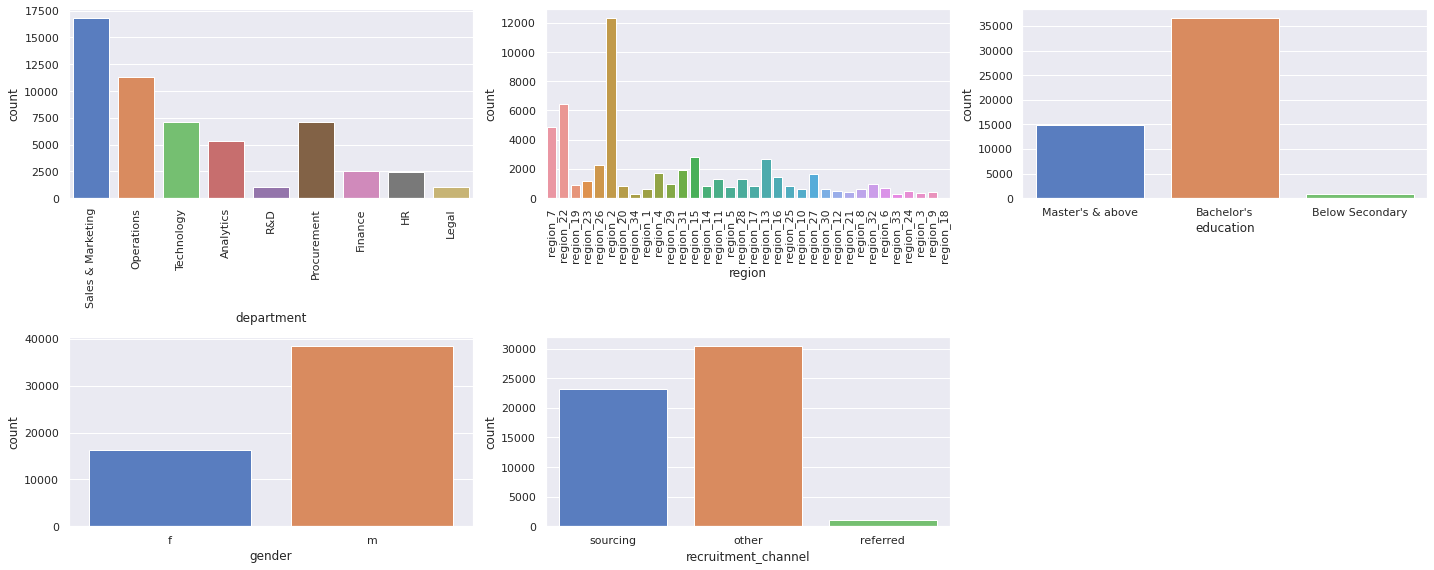

In [15]:
plt.figure(figsize=(20,8))
for i, col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(data=train, x=col)
    if col in ['department', 'region']:
        plt.xticks(rotation=90)
plt.tight_layout(pad=1.0)

## Bivariate Analysis

In [16]:
corr = train[num_cont + num_disc + target].corr()
corr

,age,length_of_service,avg_training_score,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,is_promoted
age,1.000000,0.657111,-0.048380,-0.081278,0.006008,-0.025592,-0.008169,-0.017166
length_of_service,0.657111,1.000000,-0.038122,-0.057275,0.000253,-0.077693,-0.039927,-0.010670
avg_training_score,-0.048380,-0.038122,1.000000,0.042517,0.075139,0.078391,0.072138,0.181147
no_of_trainings,-0.081278,-0.057275,0.042517,1.000000,-0.063126,-0.045576,-0.007628,-0.024896
previous_year_rating,0.006008,0.000253,0.075139,-0.063126,1.000000,0.351578,0.027738,0.159320
KPIs_met >80%,-0.025592,-0.077693,0.078391,-0.045576,0.351578,1.000000,0.097000,0.221582
awards_won?,-0.008169,-0.039927,0.072138,-0.007628,0.027738,0.097000,1.000000,0.195871
is_promoted,-0.017166,-0.010670,0.181147,-0.024896,0.159320,0.221582,0.195871,1.000000


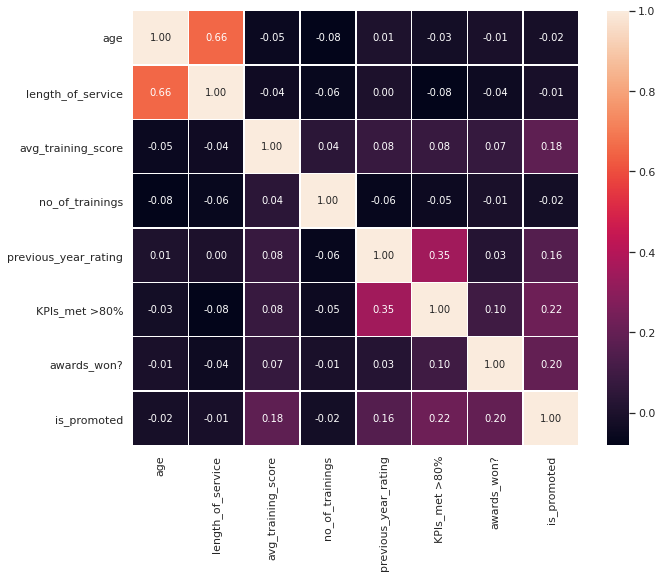

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(corr , annot=True, linewidths=.5, fmt= '.2f')

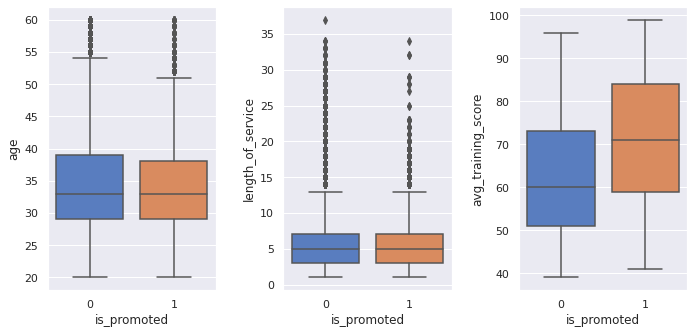

In [18]:
plt.figure(figsize=(10,5))
for i, col in enumerate(num_cont):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=train, x=target[0], y=col)
plt.tight_layout(pad=2.0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

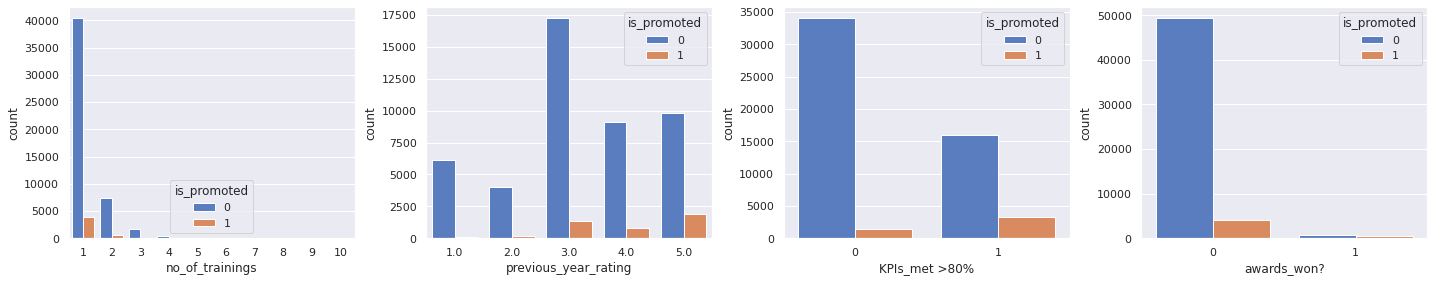

In [19]:
plt.figure(figsize=(20,4))
for i, col in enumerate(num_disc):
    plt.subplot(1,4,i+1)
    sns.countplot(train[col], hue=train[target[0]])
plt.tight_layout(pad=1.0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

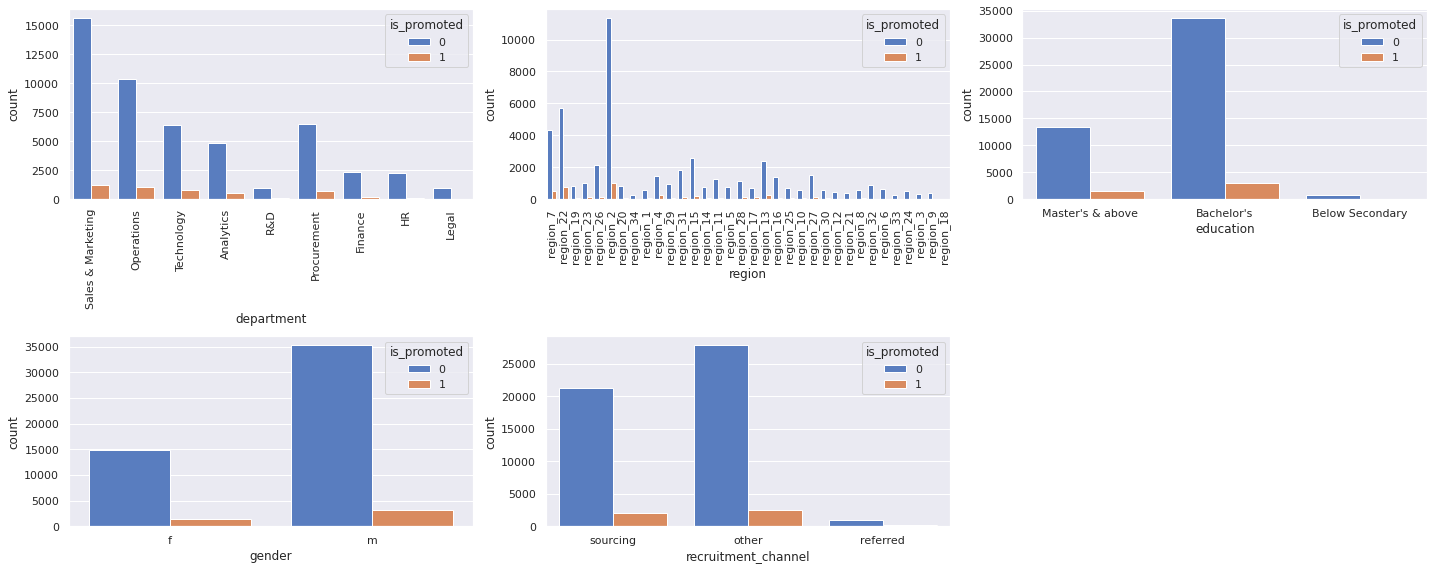

In [20]:
plt.figure(figsize=(20,8))
for i, col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(train[col], hue=train[target[0]])
    if col in ['department', 'region']:
        plt.xticks(rotation=90)
plt.tight_layout(pad=1.0)

# Preprocessing

In [21]:
X = train.drop(columns=['employee_id', 'is_promoted'])
y = train['is_promoted']
X_test = test.drop(columns=['employee_id'])

## Missing Value

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
na_col = pd.DataFrame(X.isna().sum()) / X.shape[0]*100
na_col.columns = ['NA Train']
na_col['NA Test'] = X_test.isna().sum().values / X_test.shape[0]*100
round(na_col.sort_values(by='NA Train', ascending=False), 2)

,NA Train,NA Test
previous_year_rating,7.52,7.71
education,4.40,4.40
department,0.00,0.00
region,0.00,0.00
gender,0.00,0.00
recruitment_channel,0.00,0.00
no_of_trainings,0.00,0.00
age,0.00,0.00
length_of_service,0.00,0.00
KPIs_met >80%,0.00,0.00


In [24]:
imputer = SimpleImputer(strategy='most_frequent')
X['education'] =  imputer.fit_transform(X['education'].values.reshape(-1, 1))
X_test['education'] =  imputer.transform(X_test['education'].values.reshape(-1, 1))

In [25]:
X['previous_year_rating'] =  imputer.fit_transform(X['previous_year_rating'].values.reshape(-1, 1))
X_test['previous_year_rating'] =  imputer.transform(X_test['previous_year_rating'].values.reshape(-1, 1))

In [26]:
na_col = pd.DataFrame(X.isna().sum()) / X.shape[0]*100
na_col.columns = ['NA Train']
na_col['NA Test'] = X_test.isna().sum().values / X_test.shape[0]*100
round(na_col.sort_values(by='NA Train', ascending=False), 2)

,NA Train,NA Test
department,0.0,0.0
region,0.0,0.0
education,0.0,0.0
gender,0.0,0.0
recruitment_channel,0.0,0.0
no_of_trainings,0.0,0.0
age,0.0,0.0
previous_year_rating,0.0,0.0
length_of_service,0.0,0.0
KPIs_met >80%,0.0,0.0


## Categorical Encoding

In [27]:
edu_map = {'Below Secondary': 1, 'Bachelor\'s': 2, 'Master\'s & above': 3}
gen_map = {'f': 0, 'm': 1}

for col, mapping in zip(['education', 'gender'], [edu_map, gen_map]):
    X[col] = X[col].map(mapping)
    X_test[col] = X_test[col].map(mapping)

In [28]:
import category_encoders as ce
onehot = ce.OneHotEncoder(cols=[col for col in X.columns if X[col].dtype == 'object'], use_cat_names=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
X = onehot.fit_transform(X)
X_test = onehot.transform(X_test)

In [30]:
X.head()

,department_Sales & Marketing,department_Operations,department_Technology,department_Analytics,department_R&D,department_Procurement,department_Finance,department_HR,department_Legal,region_region_7,region_region_22,region_region_19,region_region_23,region_region_26,region_region_2,region_region_20,region_region_34,region_region_1,region_region_4,region_region_29,region_region_31,region_region_15,region_region_14,region_region_11,region_region_5,region_region_28,region_region_17,region_region_13,region_region_16,region_region_25,region_region_10,region_region_27,region_region_30,region_region_12,region_region_21,region_region_8,region_region_32,region_region_6,region_region_33,region_region_24,region_region_3,region_region_9,region_region_18,education,gender,recruitment_channel_sourcing,recruitment_channel_other,recruitment_channel_referred,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,1,35,5.0,8,1,0,49
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,1,30,5.0,4,0,0,60
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,34,3.0,7,0,0,50
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,2,39,1.0,10,0,0,50
4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,1,45,3.0,2,0,0,73


In [31]:
X.shape, X_test.shape

((54808, 55), (23490, 55))

# Modeling

In [32]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics
from xgboost import XGBClassifier

In [33]:
def model_eval(model, X, y, scoring_='roc_auc', cv_=5):
    #Fit the algorithm on the data
    model.fit(X, y)
        
    #Predict training set:
    pred = model.predict(X)
    predprob = model.predict_proba(X)[:,1]

    cv_score = cross_val_score(model, X, y, cv=cv_, scoring=scoring_)
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(y.values, pred))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y.values, predprob))
    
    print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

In [34]:
base_model = XGBClassifier(seed=14, tree_method='gpu_hist')
model_eval(base_model, X, y)


Model Report
Accuracy : 0.9363
AUC Score (Train): 0.905823
CV Score : Mean - 0.9012743 | Std - 0.004543826 | Min - 0.8971417 | Max - 0.9084828


In [ ]:
# Step 1: Get initial fix learning_rate and n_estimators
test1 = {'n_estimators':range(20,101,10)}
grid1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                               max_depth=5, 
                                               min_child_weight=1, 
                                               gamma=0, 
                                               subsample=0.8, 
                                               colsample_bytree=0.8,
                                               objective= 'binary:logistic', 
                                               scale_pos_weight=1, 
                                               seed=14), 
                                               param_grid = test1, 
                                               scoring='roc_auc',
                                               n_jobs=-1,iid=False, cv=5)
grid1.fit(X, y)
grid1.best_params_, grid1.best_score_

({'n_estimators': 100}, 0.9098172198821288)

In [ ]:
# Step 2: Tune max_depth and min_child_weight
test2 = {'max_depth': range(3,10,2),
         'min_child_weight': range(1,6,2)}
grid2 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1,
                                               n_estimators=100,
                                               max_depth=5, 
                                               min_child_weight=1, 
                                               gamma=0, 
                                               subsample=0.8, 
                                               colsample_bytree=0.8,
                                               objective= 'binary:logistic', 
                                               scale_pos_weight=1, 
                                               seed=14), 
                                               param_grid = test2, 
                                               scoring='roc_auc',
                                               n_jobs=-1,iid=False, cv=5)
grid2.fit(X, y)
grid2.best_params_, grid2.best_score_

({'max_depth': 7, 'min_child_weight': 3}, 0.9099503160603)

In [ ]:
# Step 2b: Tune max_depth and min_child_weight
test2 = {'max_depth': [6,7,8],
         'min_child_weight': [2,3,4]}
grid2 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1,
                                               n_estimators=100,
                                               max_depth=5, 
                                               min_child_weight=1, 
                                               gamma=0, 
                                               subsample=0.8, 
                                               colsample_bytree=0.8,
                                               objective= 'binary:logistic', 
                                               scale_pos_weight=1, 
                                               seed=14), 
                                               param_grid = test2, 
                                               scoring='roc_auc',
                                               n_jobs=-1,iid=False, cv=5)
grid2.fit(X, y)
grid2.best_params_, grid2.best_score_

({'max_depth': 7, 'min_child_weight': 4}, 0.9103074175781263)

In [ ]:
# Step 3: Tune gamma
test3 = {'gamma': [i/10.0 for i in range(0,5)]}
grid3 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1,
                                               n_estimators=100,
                                               max_depth=7, 
                                               min_child_weight=4, 
                                               gamma=0, 
                                               subsample=0.8, 
                                               colsample_bytree=0.8,
                                               objective= 'binary:logistic', 
                                               scale_pos_weight=1, 
                                               seed=14), 
                                               param_grid = test3, 
                                               scoring='roc_auc',
                                               n_jobs=-1,iid=False, cv=5)
grid3.fit(X, y)
grid3.best_params_, grid3.best_score_

({'gamma': 0.0}, 0.9103074175781263)

In [ ]:
# Step 4: Tune subsample and colsample_bytree
test4 = {'subsample':[i/10.0 for i in range(6,10)],
         'colsample_bytree':[i/10.0 for i in range(6,10)]}
grid4 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1,
                                               n_estimators=100,
                                               max_depth=7, 
                                               min_child_weight=4, 
                                               gamma=0, 
                                               subsample=0.8, 
                                               colsample_bytree=0.8,
                                               objective= 'binary:logistic', 
                                               scale_pos_weight=1, 
                                               seed=14), 
                                               param_grid = test4, 
                                               scoring='roc_auc',
                                               n_jobs=-1,iid=False, cv=5)
grid4.fit(X, y)
grid4.best_params_, grid4.best_score_

({'colsample_bytree': 0.6, 'subsample': 0.9}, 0.9105814218317058)

In [ ]:
[i/10 for i in range(1,11)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [ ]:
# Step 5: Tuning scale_pos_weight
test5 = {'scale_pos_weight': [i/10 for i in range(1,11)]}
grid5 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1,
                                               n_estimators=100,
                                               max_depth=7, 
                                               min_child_weight=4, 
                                               gamma=0, 
                                               subsample=0.9, 
                                               colsample_bytree=0.6,
                                               objective= 'binary:logistic', 
                                               scale_pos_weight=0.9, 
                                               seed=14), 
                                               param_grid = test5, 
                                               scoring='roc_auc',
                                               n_jobs=-1,iid=False, cv=5)
grid5.fit(X, y)
grid5.best_params_, grid5.best_score_

({'scale_pos_weight': 0.9}, 0.9107307473805311)

In [ ]:
# Step 6: Tuning n_estimators and learning_rate
test6 = {'learning_rate': [0.05],
         'n_estimators': range(200,1001,200)}
grid6 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1,
                                               n_estimators=100,
                                               max_depth=7, 
                                               min_child_weight=4, 
                                               gamma=0, 
                                               subsample=0.9, 
                                               colsample_bytree=0.6,
                                               objective= 'binary:logistic', 
                                               scale_pos_weight=0.9, 
                                               seed=14), 
                                               param_grid = test6, 
                                               scoring='roc_auc',
                                               n_jobs=-1,iid=False, cv=5)
grid6.fit(X, y)
grid6.best_params_, grid6.best_score_

({'learning_rate': 0.05, 'n_estimators': 200}, 0.9111024776386725)

In [48]:
# Step 6b: Tuning n_estimators and learning_rate
test6 = {'learning_rate': [0.005],
         'n_estimators': range(2550,2571,5)}
grid6 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1,
                                               n_estimators=100,
                                               max_depth=7, 
                                               min_child_weight=4, 
                                               gamma=0,
                                               subsample=0.9, 
                                               colsample_bytree=0.6,
                                               objective= 'binary:logistic', 
                                               scale_pos_weight=0.9, 
                                               seed=14,
                                               tree_method='gpu_hist'), 
                                               param_grid = test6, 
                                               scoring='roc_auc',
                                               n_jobs=-1, cv=5)
grid6.fit(X, y)
grid6.best_params_, grid6.best_score_

({'learning_rate': 0.005, 'n_estimators': 2560}, 0.9119347280572894)

In [38]:
xgb_gpu_f1 = XGBClassifier(learning_rate=0.01,
                           n_estimators=1250,
                           max_depth=7, 
                           min_child_weight=4,
                           gamma=0,
                           subsample=0.9,
                           colsample_bytree=0.6,
                           objective= 'binary:logistic', 
                           scale_pos_weight=0.9,
                           seed=14,
                           tree_method='gpu_hist')
model_eval(xgb_gpu_f1, X, y)


Model Report
Accuracy : 0.9442
AUC Score (Train): 0.939323
CV Score : Mean - 0.9117947 | Std - 0.003375918 | Min - 0.9062813 | Max - 0.9160675


In [41]:
xgb_gpu_f2 = XGBClassifier(learning_rate=0.005,
                           n_estimators=2560,
                           max_depth=7, 
                           min_child_weight=4,
                           gamma=0,
                           subsample=0.9,
                           colsample_bytree=0.6,
                           objective= 'binary:logistic', 
                           scale_pos_weight=0.9,
                           seed=14,
                           tree_method='gpu_hist')
model_eval(xgb_gpu_f2, X, y)


Model Report
Accuracy : 0.9442
AUC Score (Train): 0.939570
CV Score : Mean - 0.9119347 | Std - 0.003343688 | Min - 0.906385 | Max - 0.9161951


In [42]:
import xgboost as xgb

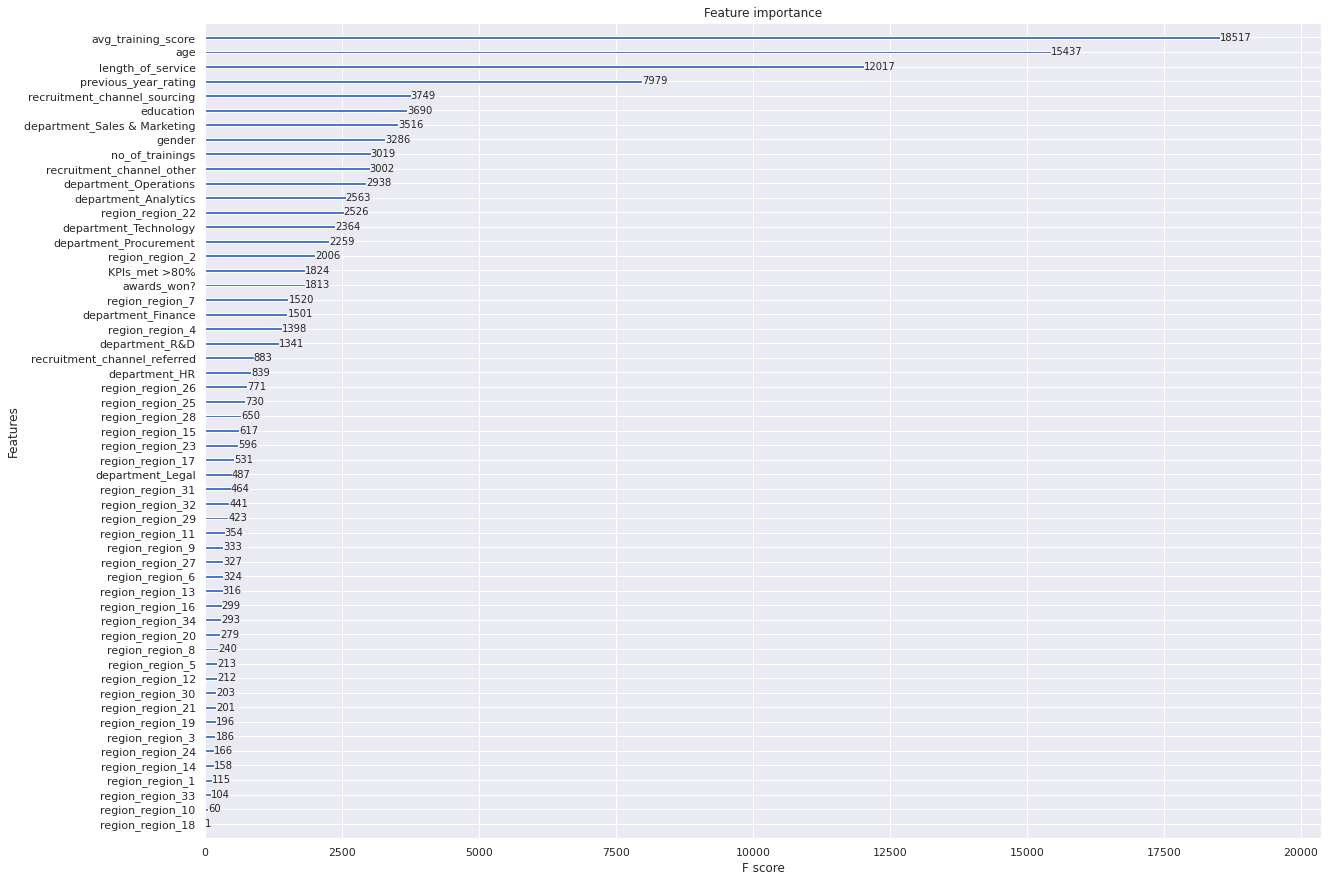

In [43]:
plt.figure(figsize=(20,15))
xgb.plot_importance(xgb_gpu_f2, ax=plt.gca())

In [44]:
pred_test = xgb_gpu_f2.predict(X_test)
output = pd.DataFrame({'employee_id': test['employee_id'],
                       'is_promoted': pred_test})
output.to_csv('submission.csv', index=False)